In [33]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('segmentation_data.csv', index_col=0)

In [5]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
corr_matr = df.corr()

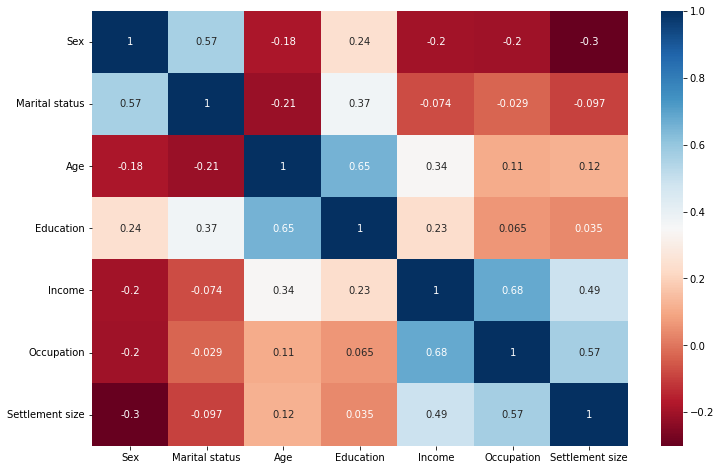

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matr, annot=True, cmap='RdBu')
plt.show()

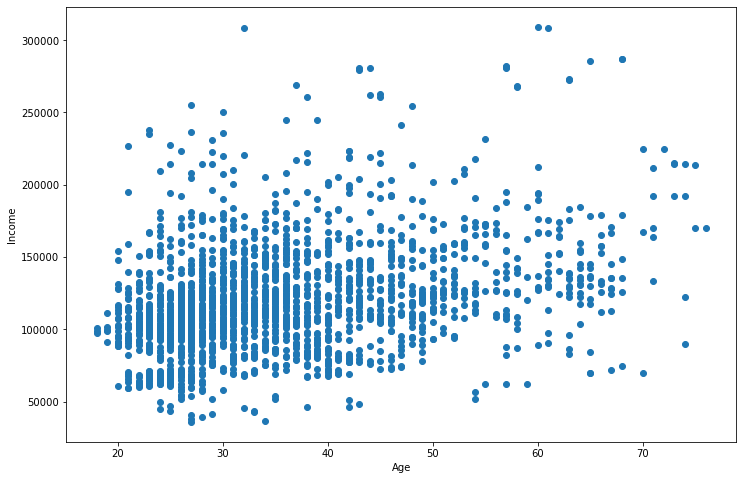

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

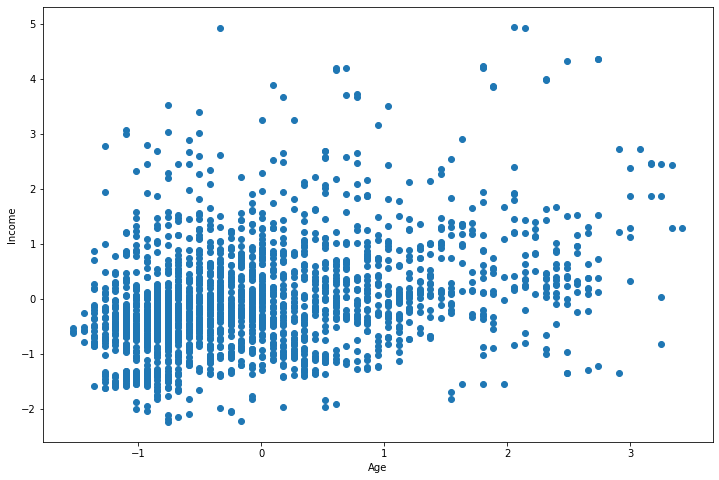

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Hierarchical clustering

In [12]:
hier_clust = linkage(scaled, method='ward')

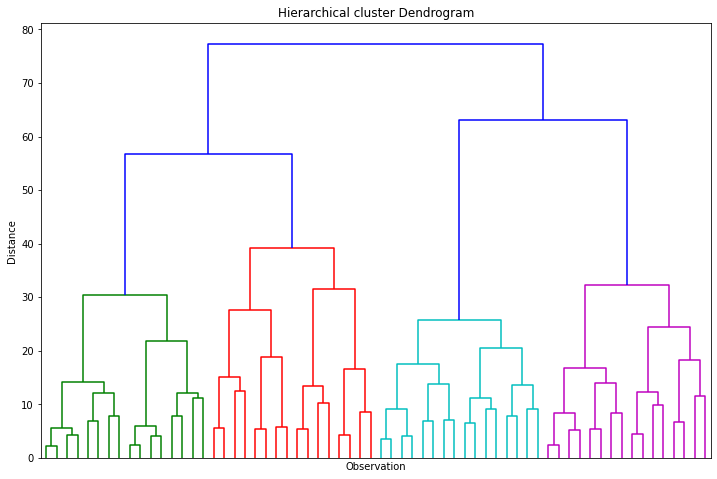

In [13]:
plt.figure(figsize=(12, 8))
plt.title('Hierarchical cluster Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode='level',
           p=5,
           show_leaf_counts=False,
           no_labels=True,
           # color_threshold=0
           )
plt.show()

within cluster squares summ WCSS. clusters quality metrics. 
mesures the distance between each observation and centroids and calculates the square distansce between thet 2

In [14]:
# k-means++ runs vefore actual KMeans algorithm and finds best starting points for centroids
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    

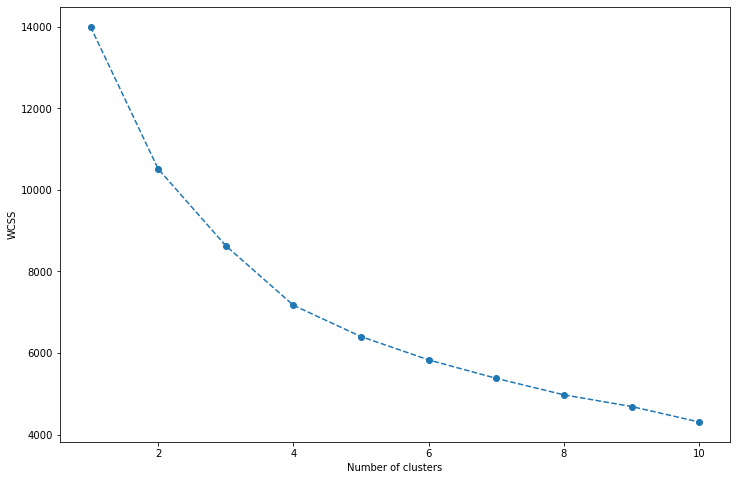

In [15]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# using elbow method to chose number of classes. 4 in this case
# hierarchical clustering gave the same result

In [17]:
kmeans = KMeans(n_clusters=4, 
                init='k-means++', 
                random_state=42)
kmeans.fit(scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
df_kmeans = df.copy()
df_kmeans['Segment_kmeans'] = kmeans.labels_
df_kmeans_analysis = df_kmeans.groupby(by=['Segment_kmeans'], as_index=False).mean()

In [19]:
df_kmeans_analysis

,Segment_kmeans,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [20]:
# after segment analysis. 
seg_classes = {0: 'Well-off', 
               1: 'Fewer Opportunities', 
               2: 'Standard',
               3: 'Career-Focused'}

In [21]:
df_kmeans_analysis['Observations_number'] = df_kmeans[['Segment_kmeans', 'Sex']].groupby(by=['Segment_kmeans']).count()

In [22]:
df_kmeans_analysis['Observations_proportion'] = df_kmeans_analysis['Observations_number'] / df_kmeans_analysis['Observations_number'].sum()

In [23]:
df_kmeans_analysis

,Segment_kmeans,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Observations_number,Observations_proportion
0,0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [24]:
df_kmeans_analysis['Segment_kmeans'].replace(seg_classes, inplace=True)

In [25]:
df_kmeans['Segment_kmeans'] = df_kmeans['Segment_kmeans'].map(seg_classes)

C:\Users\Alex\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


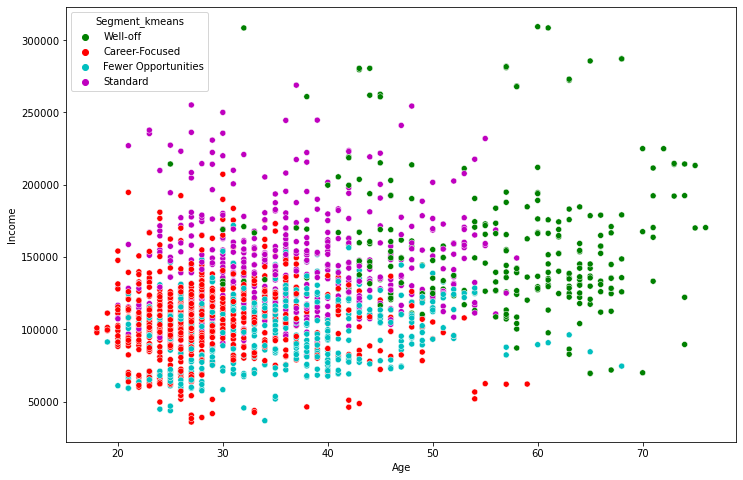

In [31]:
x_axis = df_kmeans['Age']
y_axis = df_kmeans['Income']
plt.figure(figsize=(12, 8))
sns.scatterplot(x_axis, y_axis, hue=df_kmeans['Segment_kmeans'], palette=['g', 'r', 'c', 'm'])
plt.show()

In [32]:
# Kmeans using PCA

In [34]:
pca = PCA()

In [35]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [38]:
# all 7 explains 100% of data

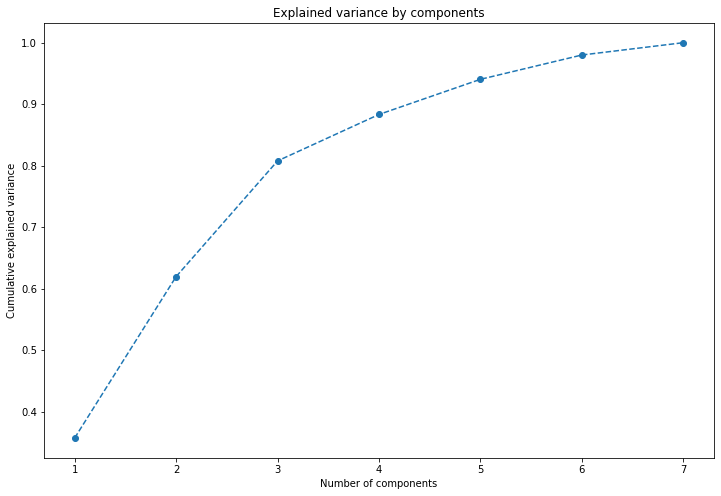

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [40]:
pca = PCA(n_components=3)

In [41]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)